# Clustering con k-means

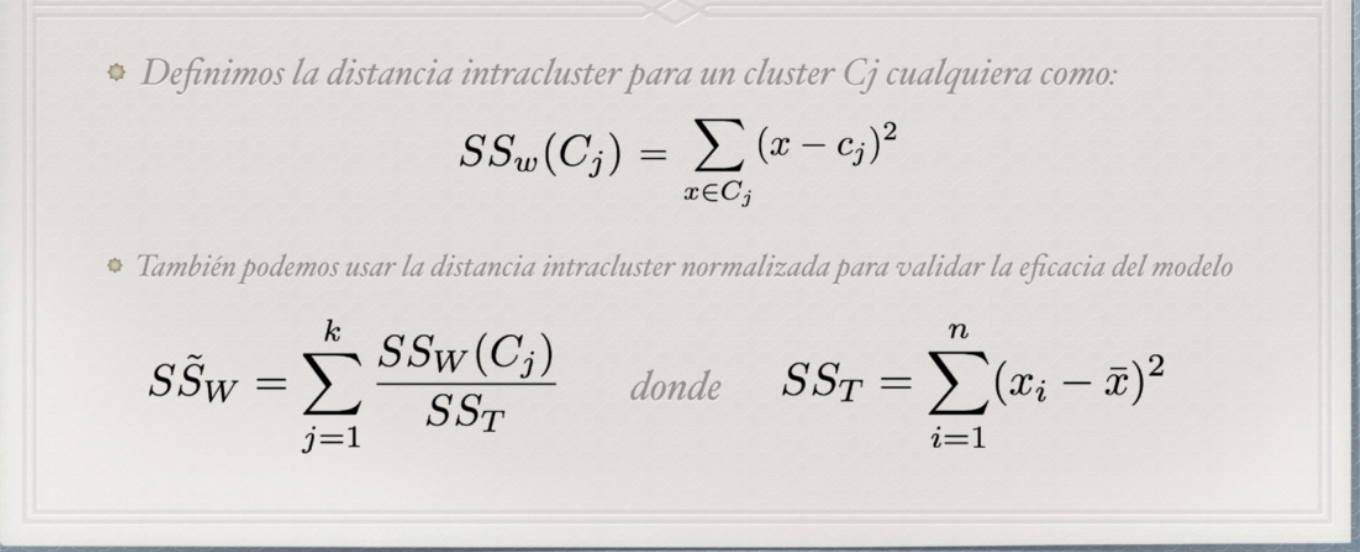

In [1]:
from IPython.display import Image
Image(filename="../resources/kmeans1.png")

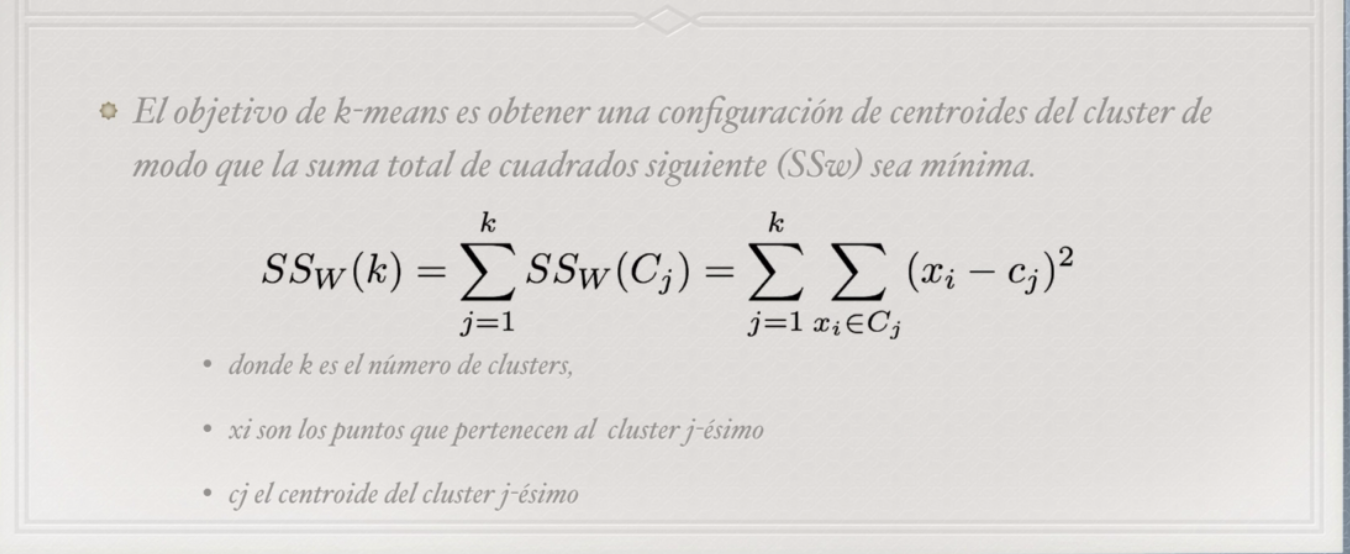

In [2]:
Image(filename="../resources/kmeans2.png")

In [16]:
import numpy as np
import random

Generamos data aleatoria para trabajar el método k-means. 
* 90 números
* Distribuidos en 3 columnas

In [32]:
np.random.seed(151091)
data = np.random.random(90).reshape(30,3)
data

array([[0.0854069 , 0.6146842 , 0.02359366],
       [0.50274587, 0.41622955, 0.10137521],
       [0.81402752, 0.45029155, 0.27884196],
       [0.95610556, 0.59536519, 0.25023277],
       [0.88468338, 0.91541155, 0.60553906],
       [0.59993568, 0.02180698, 0.49658558],
       [0.31717235, 0.40052858, 0.25429714],
       [0.68223005, 0.42706237, 0.33195258],
       [0.02475207, 0.49392144, 0.15796716],
       [0.83122941, 0.02960125, 0.97905453],
       [0.7969741 , 0.24605861, 0.56607874],
       [0.3848508 , 0.51981412, 0.39066436],
       [0.4282955 , 0.95401723, 0.89493575],
       [0.6338592 , 0.98759714, 0.92715918],
       [0.74517302, 0.48255283, 0.75284928],
       [0.50473985, 0.26810668, 0.15364444],
       [0.6082105 , 0.15154713, 0.09403576],
       [0.0734277 , 0.63431382, 0.75442621],
       [0.26765872, 0.12132034, 0.27547371],
       [0.32907004, 0.28818448, 0.88592344],
       [0.03373673, 0.81365223, 0.65034599],
       [0.59579969, 0.35071222, 0.94965933],
       [0.

Nos pondremos en el supuesto de que el experto del campo que estamos estudiando quiere generar 2 clusters $(k=2)$. Elegimos dos centroides al azar entre los valores creados.

Al crear los centroides aleatoriamente, tendremos que comprobar que no sean los mismos números. Por ello, usaremos dos semillas diferentes para generarlos.

Un problema común al elegir centroides de manera predeterminada es que el alogritmo produzca resultados diferentes cuando se ejecuta más de una vez.

In [39]:
np.random.seed(151091)
c1 = np.random.choice(range(len(data)))
np.random.seed(123)
c2 = np.random.choice(range(len(data)))
clust_centers = np.vstack([data[c1], data[c2]])
clust_centers

array([[0.32907004, 0.28818448, 0.88592344],
       [0.6338592 , 0.98759714, 0.92715918]])

Una vez determinados los centroides o el número de clusters, podemos implementar el método k-means. 

Comenzaremos por aplicar la función `vq` del paquete `scipy.cluster.vq`. Esta nos devolverá:

* 1 array con el cluster al que pertenece cada observación
* 1 array con las distancias de cada una de las 30 observaciones al centro centroide correspondiente del clustering final. Una distancia 0 en este array nos indica que esa observación es el centro del cluster

In [40]:
from scipy.cluster.vq import vq
vq(data, clust_centers)

(array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([0.95372241, 0.81367976, 0.79373193, 0.84611937, 0.41420168,
        0.54397531, 0.64164985, 0.67148549, 0.81538792, 0.57245325,
        0.56833919, 0.54958651, 0.21076621, 0.        , 0.47815215,
        0.75332299, 0.85069104, 0.44994449, 0.63581747, 0.        ,
        0.64717451, 0.28127689, 0.72826826, 0.29608545, 0.58335422,
        0.81145668, 0.30669082, 0.343186  , 0.50152857, 0.54540357]))

Otra forma de aplicar el método k-means es usar la función `kmeans` del paquete `scipy.cluster.vq`.

In [41]:
from scipy.cluster.vq import kmeans

In [42]:
kmeans(data, clust_centers)

(array([[0.42509646, 0.39180443, 0.46478248],
        [0.74233007, 0.78568903, 0.70614134]]), 0.40917896701507545)

En este caso, además de los centroides, nos aparece un valor que se corresponde con la suma de los cuadrados de los errores ($SS_W$).

K-means también funciona aportándole el número de clusters que queremos obtener (k).

In [44]:
kmeans(data, 2)

(array([[0.47876465, 0.5908633 , 0.81482642],
        [0.49602089, 0.37860103, 0.28228729]]), 0.37478281718896045)